# Offline diagnostics for the CASTLE single output networks following Rasp et al. (2018) architecture

# Lat-Lon Plots

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printe
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

In [3]:
module_path = os.path.abspath(os.path.join('..'))
# Relative imports
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [5]:
from utils.setup import SetupDiagnostics
from neural_networks.load_models import load_models, get_save_plot_folder
from neural_networks.model_diagnostics import ModelDiagnostics


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [6]:
from pathlib import Path

## Load trained CASTLE models

In [30]:
argv  = ["-c", "../output_castle/training_5_mirrored/cfg_castle_NN_Creation.yml"]
plot_dir = Path("../output_castle/training_5_mirrored/plots_offline_evaluation/using_y_zeros/")

In [8]:
castle_setup = SetupDiagnostics(argv)

In [9]:
castle_models = load_models(castle_setup)


Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_5_mirrored/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-distributed/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_0_model.h5

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_5_mirrored/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-distributed/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_1_model.h5

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_5_mirrored/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-distributed/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_2_model.h5

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_5_mirrored/models_castle/castleNN/r1.0-a1.0-b1.0-l1.0-distributed/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_3_model.h5

Load model: /work/bd1179/b309247/pychar

In [10]:
len(castle_models)

1

In [11]:
len(castle_models['castleNN'])

65

In [12]:
# Note: keys are variables not strings
castle_models['castleNN'].keys()

dict_keys(['tphystnd-3.64', 'tphystnd-7.59', 'tphystnd-14.36', 'tphystnd-24.61', 'tphystnd-38.27', 'tphystnd-54.6', 'tphystnd-72.01', 'tphystnd-87.82', 'tphystnd-103.32', 'tphystnd-121.55', 'tphystnd-142.99', 'tphystnd-168.23', 'tphystnd-197.91', 'tphystnd-232.83', 'tphystnd-273.91', 'tphystnd-322.24', 'tphystnd-379.1', 'tphystnd-445.99', 'tphystnd-524.69', 'tphystnd-609.78', 'tphystnd-691.39', 'tphystnd-763.4', 'tphystnd-820.86', 'tphystnd-859.53', 'tphystnd-887.02', 'tphystnd-912.64', 'tphystnd-936.2', 'tphystnd-957.49', 'tphystnd-976.33', 'tphystnd-992.56', 'phq-3.64', 'phq-7.59', 'phq-14.36', 'phq-24.61', 'phq-38.27', 'phq-54.6', 'phq-72.01', 'phq-87.82', 'phq-103.32', 'phq-121.55', 'phq-142.99', 'phq-168.23', 'phq-197.91', 'phq-232.83', 'phq-273.91', 'phq-322.24', 'phq-379.1', 'phq-445.99', 'phq-524.69', 'phq-609.78', 'phq-691.39', 'phq-763.4', 'phq-820.86', 'phq-859.53', 'phq-887.02', 'phq-912.64', 'phq-936.2', 'phq-957.49', 'phq-976.33', 'phq-992.56', 'fsnt', 'fsns', 'flnt', 'fl

## Lat-lon plots

In [13]:
# This variable does not exist in the code (but key nn_type is the same)
castle_model_type = "castleNN"
castle_setup.model_type = castle_model_type

In [14]:
castle_md = ModelDiagnostics(setup=castle_setup, 
                             models=castle_models[castle_model_type]) 

In [15]:
castle_md

### Single Variable

In [36]:
from utils.variable import Variable_Lev_Metadata

In [42]:
var = Variable_Lev_Metadata.parse_var_name("fsnt") # prect, fsnt


Plotting double_xy for variable fsnt

Validation batch size = 8192.
Saved plot fsnt_map_time-1.png.


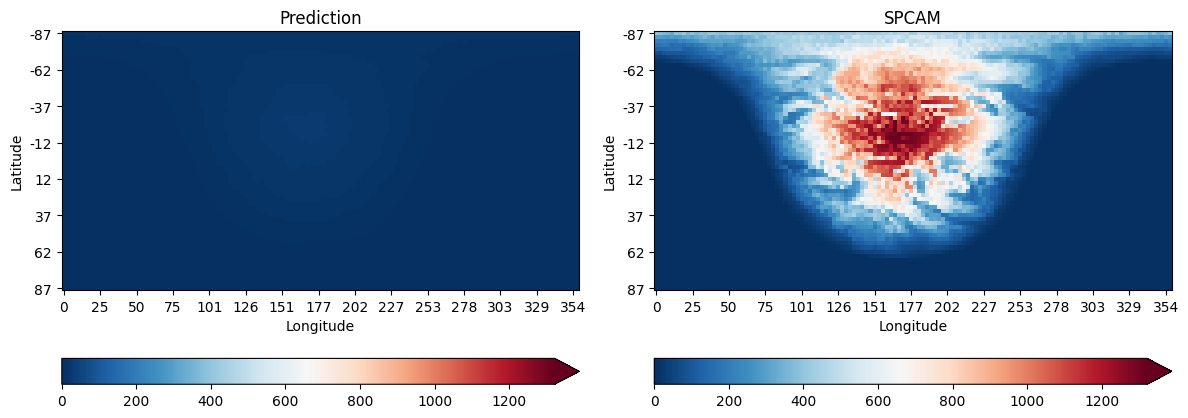

In [43]:
fig, axes = castle_md.plot_double_xy(1, var, diff=False, nTime=False, cmap="RdBu_r", save=plot_dir)
fig.show()


Plotting double_xy for variable fsnt

Validation batch size = 8192.


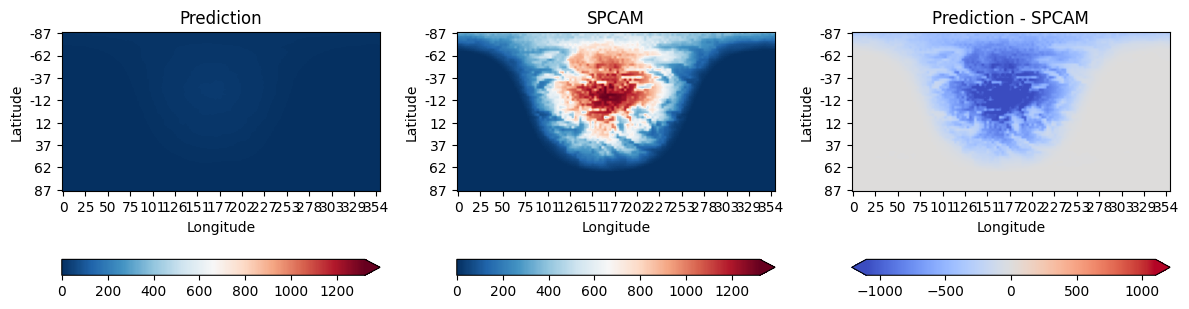

In [44]:
fig, axes = castle_md.plot_double_xy(1, var, diff=True, nTime=False, cmap="RdBu_r")
fig.show()

In [45]:
_ = castle_md.plot_double_xy(1, var, diff=True, nTime=False, cmap="RdBu_r", save=plot_dir, show_plot=False)



Plotting double_xy for variable fsnt

Validation batch size = 8192.
Saved plot fsnt_map_time-1_diff.png.

Closed plot for variable fsnt




Plotting double_xy for variable fsnt

Validation batch size = 8192.
Time samples: 90
Saved plot fsnt_map_time-mean-90steps_diff.png.


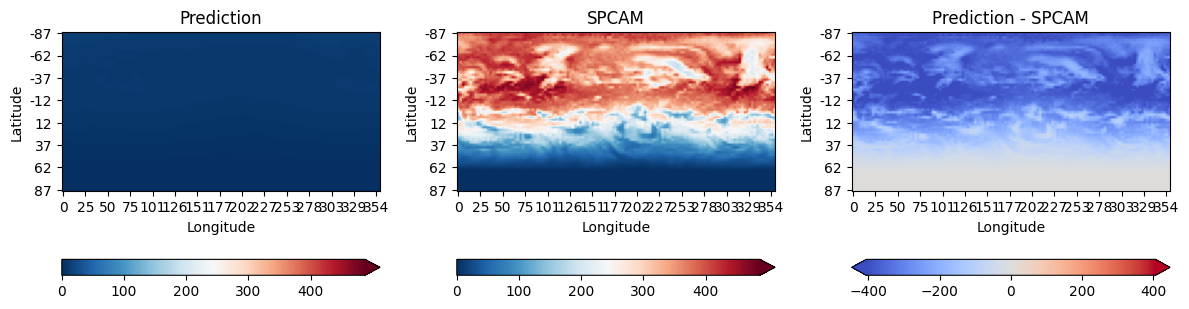

In [46]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90
fig, axes = castle_md.plot_double_xy("mean", var, diff=True, nTime=90, cmap="RdBu_r", save=plot_dir)
fig.show()

### All variables

#### Time step 1 without diff

In [23]:
i_time = 1

save_dir = Path(plot_dir, f"step-{i_time}_no_diff")
Path(save_dir).mkdir(parents=True, exist_ok=True)

for var in castle_models[castle_model_type].keys():
    print(var)
    _ = castle_md.plot_double_xy(i_time, var, diff=False, nTime=False, cmap="RdBu_r", show_plot=False, save=save_dir)

tphystnd-3.64
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-3.64_map_time-1.png.
Closed plot for variable tphystnd-3.64
tphystnd-7.59
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-7.59_map_time-1.png.
Closed plot for variable tphystnd-7.59
tphystnd-14.36
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-14.36_map_time-1.png.
Closed plot for variable tphystnd-14.36
tphystnd-24.61
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-24.61_map_time-1.png.
Closed plot for variable tphystnd-24.61
tphystnd-38.27
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-38.27_map_time-1.png.
Closed plot for variable tphystnd-38.27
tphystnd-54.6
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-54.6_map_time-1.png.
Closed plot for variable tphystnd-54.6
t

#### Time step 1 with diff

In [24]:
i_time = 1

save_dir = Path(plot_dir, f"step-{i_time}_with_diff")
Path(save_dir).mkdir(parents=True, exist_ok=True)

for var in castle_models[castle_model_type].keys():
    print(var)
    _ = castle_md.plot_double_xy(i_time, var, diff=True, nTime=False, cmap="RdBu_r", save=save_dir)

tphystnd-3.64
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-3.64_map_time-1_diff.png.
Closed plot for variable tphystnd-3.64
tphystnd-7.59
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-7.59_map_time-1_diff.png.
Closed plot for variable tphystnd-7.59
tphystnd-14.36
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-14.36_map_time-1_diff.png.
Closed plot for variable tphystnd-14.36
tphystnd-24.61
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-24.61_map_time-1_diff.png.
Closed plot for variable tphystnd-24.61
tphystnd-38.27
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-38.27_map_time-1_diff.png.
Closed plot for variable tphystnd-38.27
tphystnd-54.6
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Saved plot tphystnd-54.6_map_time-1_diff.png.
Closed plo

#### Mean without diff

In [25]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90 
# Or: 120 as Nando did
n_time = 90

save_dir = Path(plot_dir, f"mean_{n_time}-steps_no_diff")
Path(save_dir).mkdir(parents=True, exist_ok=True)

for var in castle_models[castle_model_type].keys():
    print(var)
    _ = castle_md.plot_double_xy("mean", var, diff=False, nTime=90, cmap="RdBu_r", show_plot=False, save=save_dir)

tphystnd-3.64
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-3.64_map_time-mean.png.
Closed plot for variable tphystnd-3.64
tphystnd-7.59
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-7.59_map_time-mean.png.
Closed plot for variable tphystnd-7.59
tphystnd-14.36
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-14.36_map_time-mean.png.
Closed plot for variable tphystnd-14.36
tphystnd-24.61
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-24.61_map_time-mean.png.
Closed plot for variable tphystnd-24.61
tphystnd-38.27
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-38.27_map_time-mean.png.
Closed plot for variable tphystnd-38.27
tphystnd-54.6
Plotting double_xy for variable tphystnd
Validation 

#### Mean with diff

In [27]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90
n_time = 90

save_dir = Path(plot_dir, f"mean_{n_time}-steps_with_diff")
Path(save_dir).mkdir(parents=True, exist_ok=True)

for var in castle_models[castle_model_type].keys():
    print(var)
    _ = castle_md.plot_double_xy("mean", var, diff=True, nTime=n_time, cmap="RdBu_r", show_plot=False, save=save_dir)

tphystnd-3.64
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-3.64_map_time-mean_diff.png.
Closed plot for variable tphystnd-3.64
tphystnd-7.59
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-7.59_map_time-mean_diff.png.
Closed plot for variable tphystnd-7.59
tphystnd-14.36
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-14.36_map_time-mean_diff.png.
Closed plot for variable tphystnd-14.36
tphystnd-24.61
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-24.61_map_time-mean_diff.png.
Closed plot for variable tphystnd-24.61
tphystnd-38.27
Plotting double_xy for variable tphystnd
Validation batch size = 8192.
Time samples: 90
Saved plot tphystnd-38.27_map_time-mean_diff.png.
Closed plot for variable tphystnd-38.27
tphystnd-54.6
Plotting double_xy for vari